# Employees Database technical report

### Data Modeling
* ERD was created using http://www.quickdatabasediagrams.com
* emp_no and dept_no was assigned as Primary Keys(PK) for tables employees and departments respectively.
* emp_no from salaries, titles, dept_emp, dept_manager tables is referenced as a Foreign keys (FK) to emp_no in employees table
* dept_no from dept_emp, dept_manager is referenced as a FK to dept_no in departments table
* The schema was imported into postgresql

### Data Engineering

* Tables were created in postgresql using imported schema/table structure.
* The 6 csv files were imported into the respective tables
* A complete database was created and relevant data stored in respective tables

#### Data Analysis

* Various data analysis was undertaken and performed using SQL queries. Query file provided

#### Bonus

* Imported SQL db into pandas as below and a connection to the DB was created
* The 6 tables were read and stored into dataframes
* salaries and titles tables were merged and the resulting table was grouped by 'title' to display avg salaries
* A bar plot viz was created as below
* Search for emp ID '499942' shows first and last name as "April" "Fools Day" :)
* user name and pwd not shared in the below code



In [41]:
# Pandas
import pandas as pd
import psycopg2 as pg
import numpy as np
import matplotlib.pyplot as plt

# SQL Alchemy
from sqlalchemy import create_engine

In [7]:

# get connected to the database
connection = pg.connect("dbname=6 user=<uname> password=<pwd>")

# alternate way to establish connection
#engine = create_engine('postgresql://<uname>:<pwd>@localhost:5432/6')
#connection = engine.connect()

# connect using os.environment.get
#connection = pg.connect("dbname=6 user=os.environment.get('username') password=os.environment.get('pwd')")
 
#dataframe = psql.frame_query("SELECT * FROM employees", connection)
emp_pd=pd.read_sql("select * from employees",connection)
sal_pd=pd.read_sql("select * from salaries",connection)
title_pd=pd.read_sql("select * from titles",connection)
dept_pd=pd.read_sql("select * from departments",connection)
deptemp_pd=pd.read_sql("select * from dept_emp",connection)
deptmgr_pd=pd.read_sql("select * from dept_manager",connection)
deptmgr_pd.head()

,dept_no,emp_no,from_date,to_date
0,d001,110022,1985-01-01,1991-10-01
1,d001,110039,1991-10-01,9999-01-01
2,d002,110085,1985-01-01,1989-12-17
3,d002,110114,1989-12-17,9999-01-01
4,d003,110183,1985-01-01,1992-03-21


In [13]:
salTitle_pd=pd.merge(sal_pd,title_pd,on='emp_no',how='outer')
salTitle_pd.head()

,emp_no,salary,from_date_x,to_date_x,title,from_date_y,to_date_y
0,10001,60117,1986-06-26,1987-06-26,Senior Engineer,1986-06-26,9999-01-01
1,10002,65828,1996-08-03,1997-08-03,Staff,1996-08-03,9999-01-01
2,10003,40006,1995-12-03,1996-12-02,Senior Engineer,1995-12-03,9999-01-01
3,10004,40054,1986-12-01,1987-12-01,Engineer,1986-12-01,1995-12-01
4,10004,40054,1986-12-01,1987-12-01,Senior Engineer,1995-12-01,9999-01-01


In [20]:
# groupby title to display average salaries
avgsalbyTitle = salTitle_pd.groupby('title').agg({'salary': np.mean})
avgsalbyTitle=avgsalbyTitle.reset_index()
avgsalbyTitle

,title,salary
0,Assistant Engineer,48493.204786
1,Engineer,48539.781423
2,Manager,51531.041667
3,Senior Engineer,48506.751806
4,Senior Staff,58503.286614
5,Staff,58465.271904
6,Technique Leader,48580.505772


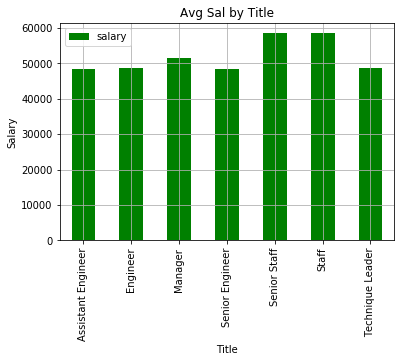

<Figure size 432x288 with 0 Axes>

In [40]:
avgsalbyTitle.plot(kind='bar',x='title',y='salary',color='green',align="center")
plt.grid()
plt.title("Avg Sal by Title")
plt.xlabel("Title")
plt.ylabel("Salary")
plt.show()
plt.savefig("Avg Sal by Title.png")